# Building a Dataset
If you already have a dataset you're applying the content in this book to, you can skip this section!  I'll walk through how I created this dummy data using randomization and forced distributions.  There will be some coding principles applied here.  If you’re using this book as a means to improve your general coding skills, I’d encourage you to follow this section more closely as it will get into creating your own functions, specifically calling out how to do it in a way that you don’t have to dig through all your code and find where you hard coded numbers.  If you’re reading through this to understand the specific People Analytics applications or as an HR leader looking to know what is possible, I have saved the output from this to the repository, so you can access it there without having to create your own version (you can also skip this section).

Given the sensitivity of HR data, most companies aren’t jumping at the opportunity to throw their employee data onto the internet for all to use.  Having searched for various datasets online, all were snapshots of their employees rather than a historical record accounting for promotions or specific termination dates.  While the extra complexity isn’t ideal, it can make for good learning opportunities in writing your coding and better understanding how generating random numbers can be leveraged to improve your capabilities!

If you make it through the end of this chapter, you'll see how nice it is to have existing datasets that you can leverage.  From the technical aspect, this chapter took the longest time to write the code for because there are a lot of considerations that have to be worked through to ensure you're generating a generally accurate and useful dateset for modeling.

#### Fake Company Backstory
The company we are creating is a medium sized management consulting company that started in 2005.  They have 3 departments: Technology, Account/Client Management, and Corporate Admin (HR, Finance, etc).  The company started with a total of 12,500 employees at the beginning of 2018.  Based on the HR Business Partner’s experienced and feedback from the business, there is a concern that females and younger employees turnover at a higher rate.  Will our turnover prediction model show what the HRBP’s are saying?

#### Import Necessary Packages
Throughout this book, you'll see the common theme of loading the packages at the beginning of your code.  This makes it easier for your to go back as you're developing your solution to know what libraries you've loaded.  Sometimes are you're writing code you'll try something with a package and it won't work/be needed in your final solution (that is normal and okay!).  Since that package isn't in your final solution, you don't want to keep it as a dependency in your code, so you want to delete the import statement.  Rather than digging through all your code, you can go to the top and find the import code and delete it.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
from datetime import timedelta

#### Setting our variables
As I stated in the intro to this chapter, we will be using some coding best practices.  In this area, we will define all of our distributions so when/if we want to make adjustments to our distributions we can do so in one place rather than throughout our code.  This will save time and reduce the opportunity for a manual error where we forget to make a change somewhere.

These numbers we will be used with a random number generator, so each time you run this process you will get a different result. If we set our seed number, we can control for this, however we are less concerned about reproducability here.

Note: with this many variables to define, a config (configuration) file would likely be the most efficient approach.  However, for the sake of this example I am writing out each variable to help with the readability of our code when creating the dataset.

In [2]:
#total employee count
emps_2018 = 12500

#new hire rate per year
new_hire_rate = 0.15

min_age = 21
max_age = 65

#employee distributions by department
tech = 0.6
client_mgmt = 0.9
admin = 1

#gender distribution by department
tech_male = 0.65
client_mgmt_male = 0.55
admin_male = 0.45

#individual contributor by department
tech_ic = 0.6
client_mgmt_ic = 0.5
admin_ic = 0.4

#manager by department
tech_mgr = 0.8
client_mgmt_mgr = 0.75
admin_mgr = 0.8

#senior leader by department
tech_sl = 0.9
client_mgmt_sl = 0.95
admin_sl = 0.95

#executive by department
tech_exec = 1
client_mgmt_exec = 1
admin_exec = 1

#### Creating each employee
One of the biggest problems with generating “fake” data is getting the appropriate distributions and relationships between variables.  The order in which we execute each step will be important as some of these variables build on each other. To do this, we will start with the demographic information about individuals using our forced distributions.

We'll utilize a for loop and have it iterate over the number of employees we want to define.  Using the random number function in numpy, we will reference our distributions above to determine how many employees are in each department.  Using empty lists and appending values to them is a common practice when writing code.  If you are looking to enhance your coding skillset, I'd recommend becoming familiar with this concept.

In [3]:
#create our empty lists, this will allow us to append values into these lists
departments = []
employee_numbers = []

for emp in range(0, emps_2018):
    #generate random number
    random_number = np.random.random()
    
    #put employee number into list
    employee_numbers.append(emp)
    
    #use random number to determine which value to append to the departments list
    #after this finished, it will be a list of the same number of employees you defined
    if random_number <= tech:
        departments.append("Technology")
    elif ((random_number > tech) and (random_number <= client_mgmt)):
        departments.append("Account/Client Management")
    else:
        departments.append("Corporate Admin (HR, Finance, etc)")


In [4]:
print("Technology: ", departments.count("Technology"))
print("Account/Client Management: ", departments.count("Account/Client Management"))
print("Corporate Admin (HR, Finance, etc): ", departments.count("Corporate Admin (HR, Finance, etc)"))

Technology:  7560
Account/Client Management:  3696
Corporate Admin (HR, Finance, etc):  1244


We've just created the start of our employee records.  We have defined which departments they are in.  You can see the counts for each value above.  As we have specified, we see the technology department being the largest, followed by Account/Client Management, and then the Corporate Admin functions.

Now that we have each employee's record and their department, we will define their gender based on the department specific gender distributions defined above.

In [5]:
#create an empty list to put our gender values
genders = []

for emp_department in departments:
    random_number = np.random.random()
    
    #this time we need a nested if statement
    #this allows us to have the different distributions for each department
    if emp_department == "Technology":
        if random_number <= tech_male:
            genders.append("Male")
        else:
            genders.append("Female")
    elif emp_department == "Account/Client Management":
        if random_number <= client_mgmt_male:
            genders.append("Male")
        else:
            genders.append("Female")
    else:
        if random_number <= admin_male:
            genders.append("Male")
        else:
            genders.append("Female")

In [6]:
print("Male: ", genders.count("Male"))
print("Female: ", genders.count("Female"))

Male:  7498
Female:  5002


We've now create the gender for all of our employees based on the distributions we defined by department.

Now we need to create the job level for department.  This is very similar to how we created gender.

In [7]:
job_level = []

for emp_department in departments:
    random_number = np.random.random()
    if emp_department == "Technology":
        if random_number <= tech_ic:
            job_level.append("Individual Contributor")
        elif (random_number > tech_ic) and (random_number <= tech_mgr):
            job_level.append("Manager")
        elif (random_number > tech_mgr) and (random_number <= tech_sl):
            job_level.append("Senior Leader")
        else:
            job_level.append("Executive")
    elif emp_department == "Account/Client Management":
        if random_number <= client_mgmt_ic:
            job_level.append("Individual Contributor")
        elif (random_number > client_mgmt_ic) and (random_number <= client_mgmt_mgr):
            job_level.append("Manager")
        elif (random_number > client_mgmt_mgr) and (random_number <= client_mgmt_sl):
            job_level.append("Senior Leader")
        else:
            job_level.append("Executive")
    else:
        if random_number <= admin_ic:
            job_level.append("Individual Contributor")
        elif (random_number > admin_ic) and (random_number <= admin_mgr):
            job_level.append("Manager")
        elif (random_number > admin_mgr) and (random_number <= admin_sl):
            job_level.append("Senior Leader")
        else:
            job_level.append("Executive")

In [8]:
print("Individual Contributor: ", job_level.count("Individual Contributor"))
print("Manager: ", job_level.count("Manager"))
print("Senior Leader: ", job_level.count("Senior Leader"))
print("Executive: ", job_level.count("Executive"))

Individual Contributor:  6925
Manager:  2844
Senior Leader:  1713
Executive:  1018


So now we have 4 seperate lists.  Since most people think in terms of spreadsheets, you're probably thinking "4 lists aren't very useful".  Fear not, we can put these lists into a dataframe, making these lists our columns.

First we need to put all of our lists together using the zip() function.  This will put our lists together so the Pandas dataframe function will know how to turn our lists into columns.

In [9]:
combined_lists = zip(employee_numbers, departments, genders, job_level)

df_emp_working = pd.DataFrame(combined_lists, columns = ['employee_id', 'department', 'gender', 'job_level'])

df_emp_working.head()

,employee_id,department,gender,job_level
0,0,Account/Client Management,Male,Individual Contributor
1,1,Technology,Male,Individual Contributor
2,2,Account/Client Management,Male,Individual Contributor
3,3,Account/Client Management,Male,Individual Contributor
4,4,Account/Client Management,Male,Individual Contributor


Ta da! Our lists are now in the same dataframe.  A common concern I have seen others have with this approach is "how don't the rows get all mixed up/how do you know the right rows are coming together?".  In the world of vlookups or SQL joins, this is an understandable concern, however lets break down what we just did.  We created 4 lists that are based off of each other.  The key piece to this is we didn't change the order of our lists, which is why we can simply put them together as columns rather than joining on a unique ID.  If you're thinking in Excel terms, we copied and pasted different data together that has the same order and length into the same sheet.

With that done, now we have to incorporate our configuration file that utilizes this demographic information to create realistic trends that our model can hopefully find!  To do that, we need to load in the configuration file.  This is available in the repository if you're following this as a tutorial.

The config file has two types of distributions.  The first is similar to how we generated the employee department, gender, and job level.  We use a random number to compare it with our defined distributions to generate the value.  The second goes one step further and randomly selects a value between two values.

## Creating Data with Config File

In [10]:
config = pd.read_excel('generate_dataset_config.xlsx')

print(config.head())
print(config.tail())

               metric          employee_level rating  probability  value
0  Performance Rating  Individual Contributor    one         0.05    NaN
1  Performance Rating  Individual Contributor    two         0.15    NaN
2  Performance Rating  Individual Contributor  three         0.55    NaN
3  Performance Rating  Individual Contributor   four         0.85    NaN
4  Performance Rating  Individual Contributor   five         1.00    NaN
        metric          employee_level rating  probability  value
87  Promotions               Executive      4         0.02    NaN
88  Promotions  Individual Contributor      5         0.20    NaN
89  Promotions                 Manager      5         0.17    NaN
90  Promotions           Senior Leader      5         0.15    NaN
91  Promotions               Executive      5         0.10    NaN


With our config file loaded, I'll explain at a high level how we will use this file.

We will be filtering on the columns to come down to a single value that we can use.  This is in place of manually defining each of these variables like we did to create the department, gender, and job level.  It will become a bit more clear when we get into the code, however you should see the efficiencies in this config file approach.

For those with more coding experience, you may be questioning why I didn't loop through each of the metrics.  I am leaving some programming efficiencies on the table for the sake of making the code easier to read.

In [11]:
#creating list of our metrics that are defined in the same way
performance = []

for emp in df_emp_working['job_level']:
    random_number = np.random.random()
    
    #creating a temporary dataframe to filter our config file to what we need in each iteration
    temp_df = config[(config['metric'] == 'Performance Rating') & (config['employee_level'] == emp)]
    
    if temp_df[temp_df['rating'] == "one"]['probability'].iloc[0] >= random_number:
        performance.append(1)
    elif temp_df[temp_df['rating'] == "two"]['probability'].iloc[0] > random_number:
        performance.append(2)
    elif temp_df[temp_df['rating'] == "three"]['probability'].iloc[0] > random_number:
        performance.append(3)
    elif temp_df[temp_df['rating'] == "four"]['probability'].iloc[0] > random_number:
        performance.append(4)
    elif temp_df[temp_df['rating'] == "five"]['probability'].iloc[0] >= random_number:
        performance.append(5)

To give us an idea of the performance distribution, lets do a basic histogram of our performance data.  As you would typically see, there performance ratings for our data will have a left skew.  This means average performance rating is higher than we the true average of the range.

I personally find visualizing data with R or Python more difficult, especially when it comes to basic charts like histograms, bar graphs, etc.  However, some of these basic charts can be quite useful when doing analysis.  Rather than exporting out into Excel or even going further and exporting to Excel and putting it into Tableau or PowerBI, you can get a basic histogram like the below in 2 lines of pretty simple code.

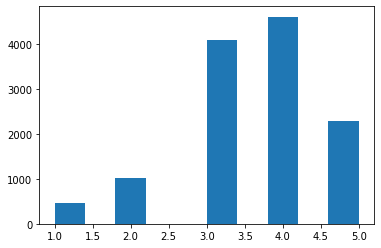

In [12]:
plt.hist(performance)
plt.show()

Doing the same thing for engagement that we just did for performance.

In [13]:
engagement = []

for emp in df_emp_working['job_level']:
    random_number = np.random.random()
    
    #creating a temporary dataframe to filter our config file to what we need in each iteration
    temp_df = config[(config['metric'] == 'Engagement') & (config['employee_level'] == emp)]
    
    if temp_df[temp_df['rating'] == "one"]['probability'].iloc[0] >= random_number:
        engagement.append(1)
    elif temp_df[temp_df['rating'] == "two"]['probability'].iloc[0] > random_number:
        engagement.append(2)
    elif temp_df[temp_df['rating'] == "three"]['probability'].iloc[0] > random_number:
        engagement.append(3)
    elif temp_df[temp_df['rating'] == "four"]['probability'].iloc[0] > random_number:
        engagement.append(4)
    elif temp_df[temp_df['rating'] == "five"]['probability'].iloc[0] >= random_number:
        engagement.append(5)

Also making a histogram for our engagement distribution.  We see the distribution leans towards the book ends, suggesting there are a number of engagement employees and a number of unengaged employees.

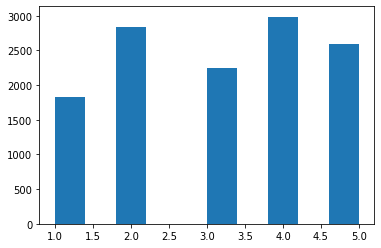

In [14]:
plt.hist(engagement)
plt.show()

How we calculate salary and tenure will be slightly different as I mentioned above.  Rather than having one level of randomization, we're adding a second layer.  This is because the range of values for salary and tenure is quite a bit larger than our 1-5 scales of performance and engagement.  We have "lower" and "higher" ranges defined in our config file.  The first layer of randomization will select if the higher or lower range will be used.  Once the range is specified, a random number will be generated within that range.  This will provide us a more custom distribution to account for the differences we may see in the salary of the employees at different levels of the company.

In [15]:
salary = []

for emp in df_emp_working['job_level']:
    random_number = np.random.random()
    temp_df = config[(config['metric'] == 'Salary') & (config['employee_level'] == emp)]
    if temp_df['probability'].max() <= random_number:
        lower_number = temp_df[temp_df['rating'] == 'lower min']['value'].iloc[0]
        upper_number = temp_df[temp_df['rating'] == 'lower max']['value'].iloc[0]
        random_salary = np.random.randint(lower_number, upper_number)
        salary.append(random_salary)
    else:
        lower_number = temp_df[temp_df['rating'] == 'higher min']['value'].iloc[0]
        upper_number = temp_df[temp_df['rating'] == 'higher max']['value'].iloc[0]
        random_salary = np.random.randint(lower_number, upper_number)
        salary.append(random_salary)

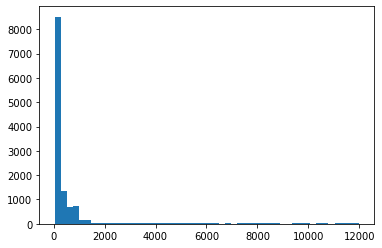

In [16]:
plt.hist(salary, bins=50)
plt.show()

As would be expected, we see a significant right skew with the employee salaries.  A small number of employees make large salaries while most make much smaller salaries.

Now onto tenure!

In [17]:
tenure = []

for emp in df_emp_working['job_level']:
    random_number = np.random.random()
    temp_df = config[(config['metric'] == 'Tenure') & (config['employee_level'] == emp)]
    if temp_df['probability'].max() <= random_number:
        lower_number = temp_df[temp_df['rating'] == 'lower min']['value'].iloc[0]
        upper_number = temp_df[temp_df['rating'] == 'lower max']['value'].iloc[0]
        random_tenure = np.random.randint(lower_number, upper_number)
        tenure.append(random_tenure)
    else:
        lower_number = temp_df[temp_df['rating'] == 'higher min']['value'].iloc[0]
        upper_number = temp_df[temp_df['rating'] == 'higher max']['value'].iloc[0]
        random_tenure = np.random.randint(lower_number, upper_number)
        tenure.append(random_tenure)

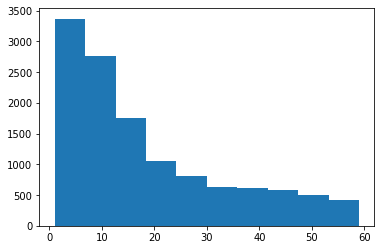

In [18]:
plt.hist(tenure)
plt.show()

As is the case with most companies, you see a lot of lower tenured employees and fewer more tenure employees.

Now that we have created a few additional columns, let's add our lists as columns into our dataframe we created with our other lists.  This requires an additional step to bring our dataframes together.  So first, we take our 4 new lists and make them into a dataframe, then we can use the concat() function in Pandas.  The axis parameter is one that is quite simple once you're given an explanation.  When set to 0, it will be row-wise, or stack the dataframes on top of each other making your dataframe longer.  In R, this is done with the rbind() function.  When set to 1, it will be column-wise, or put the columns together vertically, making your dataframe wider.  In R, this done with the cbind() function.

In [19]:
combined_lists = zip(performance, engagement, salary, tenure)

temp_df = pd.DataFrame(combined_lists, columns = ['performance_rating', 'engagement', 'salary_thousands', 'tenure_years'])
df_emp_working = pd.concat([df_emp_working, temp_df], axis = 1)
df_emp_working.head()

,employee_id,department,gender,job_level,performance_rating,engagement,salary_thousands,tenure_years
0,0,Account/Client Management,Male,Individual Contributor,2,3,165,49
1,1,Technology,Male,Individual Contributor,4,5,68,23
2,2,Account/Client Management,Male,Individual Contributor,4,5,109,11
3,3,Account/Client Management,Male,Individual Contributor,4,3,143,27
4,4,Account/Client Management,Male,Individual Contributor,3,5,83,8


Our dataset is really coming together!  We have a few more items to still cover though.  First we will tackle adding in age.  This is a bit more complex given the logical requirements of someone with 50 years of tenure cannot be in their 20's (insert mediocre Benjamin Button joke).

In [20]:
age = []

for tenure in df_emp_working['tenure_years']:
    random_age = np.random.randint(21, 65)
    if tenure + 21 < random_age:
        age.append(tenure + np.random.randint(21, 30))
    else: 
        age.append(random_age)
    

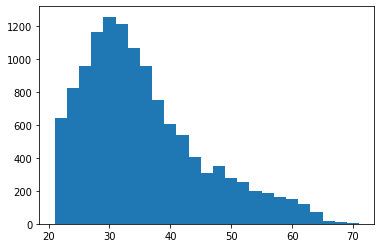

In [21]:
plt.hist(age, bins = 25)
plt.show()

In [22]:
temp_df = pd.DataFrame(age, columns = ['age_years'])
df_emp_working = pd.concat([df_emp_working, temp_df], axis = 1)
df_emp_working.head()

,employee_id,department,gender,job_level,performance_rating,engagement,salary_thousands,tenure_years,age_years
0,0,Account/Client Management,Male,Individual Contributor,2,3,165,49,36
1,1,Technology,Male,Individual Contributor,4,5,68,23,25
2,2,Account/Client Management,Male,Individual Contributor,4,5,109,11,33
3,3,Account/Client Management,Male,Individual Contributor,4,3,143,27,52
4,4,Account/Client Management,Male,Individual Contributor,3,5,83,8,34


This shows us that the age of our employees skew younger.  Next we want to add some more interesting differences in our dataset by adding promotions into the mix.  This will create additional records for us to observe within a given year.

In [23]:
promotions = []

for emp in df_emp_working['employee_id']:
    random_number = np.random.random()
    temp_emp_df = df_emp_working[df_emp_working['employee_id'] == emp]
    performance_val = temp_emp_df['performance_rating'].iloc[0]
    emp_type = temp_emp_df['job_level'].iloc[0]
    temp_df = config[(config['metric'] == 'Promotions') & 
                     (config['employee_level'] == emp_type) & 
                     (config['rating'] == performance_val)]
    if random_number <= temp_df['probability'].iloc[0]:
        promotions.append(1)
    else:
        promotions.append(0)

In [24]:
print("Promoted: ", promotions.count(1))
print("Not Promoted: ", promotions.count(0))

print("Promotion Rate: ",promotions.count(1) / len(promotions))

Promoted:  880
Not Promoted:  11620
Promotion Rate:  0.0704


We will add our promotion list to our existing dataset now.

In [25]:
temp_df = pd.DataFrame(promotions, columns = ['promotion_indicator'])
df_emp_working = pd.concat([df_emp_working, temp_df], axis = 1)
df_emp_working.head()

,employee_id,department,gender,job_level,performance_rating,engagement,salary_thousands,tenure_years,age_years,promotion_indicator
0,0,Account/Client Management,Male,Individual Contributor,2,3,165,49,36,0
1,1,Technology,Male,Individual Contributor,4,5,68,23,25,1
2,2,Account/Client Management,Male,Individual Contributor,4,5,109,11,33,0
3,3,Account/Client Management,Male,Individual Contributor,4,3,143,27,52,0
4,4,Account/Client Management,Male,Individual Contributor,3,5,83,8,34,0


Now it is time to make our new hires!  Since we have established this company hires about 15% of its workforce count as of the first of each year, we will need to generate these new employees using the same logic we have just gone through for our initial employees.  Rather than simply copying and pasting our code, we are going to leverage an approach of creating our own functions and then referencing them.

In [26]:
import employee_creation as ec
new_emps = ec.create_new_employees(last_emp_number = df_emp_working['employee_id'].max(), 
                     emp_count = 12500, new_hire_rate = .15, year_of_data = 2018)
new_emps.head()

,employee_id,department,gender,job_level,performance_rating,engagement,salary_thousands,tenure_years,age_years,promotion_indicator,record_start_date,record_end_date
0,12506,"Corporate Admin (HR, Finance, etc)",Male,Individual Contributor,,,44,0,49,0,2018-01-05,2018-12-31
1,12511,Technology,Female,Individual Contributor,,,189,0,56,0,2018-03-24,2018-12-31
2,12514,Account/Client Management,Female,Individual Contributor,,,55,0,61,0,2018-08-19,2018-12-31
3,12525,Technology,Male,Manager,,,171,0,37,0,2018-10-26,2018-12-31
4,12533,Account/Client Management,Male,Senior Leader,,,483,0,32,0,2018-01-14,2018-12-31


As you can see above, we have now created a new dataset that contains our new hires for the year.  The import statement for employee_creation is the other Python file containing the function that was written.  If you find yourself copying and pasting complex logic, it is often best to utilize this approach.  If you find your team utilizing the same or similar types of actions or custom functions, this is a great approach to leverage so your team is able to gain efficiencies and accuracies by leveraging the same "package".

Almost there with our data!  Next we will put in the record start and end dates.  We will only need to create new records for our employees who were promoted.  For simplicity, we will assume people at this company can only be promoted twice per year.

In [27]:
df_emp_working['record_start_date'] = datetime.datetime(2018, 1, 1)

record_end_date = []

for emp in df_emp_working['promotion_indicator']:
    random_number = np.random.random()
    if (random_number <= .75) & (emp == 1):
        record_end_date.append(datetime.datetime(2018, 4, 1))
    elif (random_number > .75) & (emp == 1):
        record_end_date.append(datetime.datetime(2018, 10, 1))
    else:
        record_end_date.append(datetime.datetime(2018, 12, 31))
        
end_date_df = pd.DataFrame(record_end_date, columns = ['record_end_date'])
df_emp_working = pd.concat([df_emp_working, end_date_df], axis = 1)

So now we have our dates we can use to identify when a record is validate as of.  Now we will use that record to create the new record for those employees who were promoted.

We will first get the new start and end dates we want for the record.

In [28]:
from datetime import timedelta
promoted_emps = df_emp_working[(df_emp_working['promotion_indicator'] == 1)]

promoted_emps['record_start_date'] = promoted_emps['record_end_date'] + timedelta(days=1)
promoted_emps['record_end_date'] = datetime.datetime(2018, 12, 31)

C:\Users\jason\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\jason\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Now we want to account for some employees being promoted into a new job level.  We will use some basic probabilities to determine what employees are promoted into a new job level and which will remain in their existing job level.

In [29]:
new_job_level = []

for emp in promoted_emps['job_level'].to_list():
    random_number = np.random.random()
    if emp == 'Individual Contributor':
        if random_number <= .05:
            new_job_level.append("Manager")
        else:
            new_job_level.append("Individual Contributor")
    elif emp == 'Manager':
        if random_number <= 0.05:
            new_job_level.append("Senior Leader")
        else:
            new_job_level.append("Manager")
    elif emp == 'Senior Leader':
        if random_number <= 0.03:
            new_job_level.append("Executive")
        else:
            new_job_level.append("Senior Leader")
    else:
        new_job_level.append("Executive")



Now we replace the old job level with the new one

In [30]:
promoted_emps['job_level'] = new_job_level

C:\Users\jason\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now we will reset the promotion indicator so we don't think these individuals were promoted twice within the same calendar year.

In [31]:
promoted_emps['promotion_indicator'] = 0

C:\Users\jason\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now lets put our original dataset, our new hires, and promoted employee records together into a single data set!  Rather than the axis = 1, we will now the axis = 0 as we want to put the different dataframes on top of each other, not side to side.

In [32]:
temp_combined = pd.concat([df_emp_working, promoted_emps], axis = 0)
temp_combined = pd.concat([temp_combined, new_emps], axis = 0)

Some brief clean up to change the data types of our columns to align with what we want.  Specifically the performance and engagement columns are not currently integers, which we will want to make our lives a bit easier when trying to put together our termination logic.  We also want to convert our record start date to the same datetime type as our record end date.  This will help save some frustrations later on when trying to leverage our dates.

In [33]:
temp_combined['performance_rating'] = pd.to_numeric(temp_combined['performance_rating'])
temp_combined['engagement'] = pd.to_numeric(temp_combined['engagement'])
temp_combined['record_start_date'] = pd.to_datetime(temp_combined['record_start_date'])

Now the final step in creating this dataset (finally), creating the termination date.  Since this will be used for a termination prediction model, I'll be a bit lighter on the details, but I can tell you that the model will find some pattern :)

In [34]:
termination_indicator = []
termination_date = []
new_record_end_date = []

for emp in temp_combined['employee_id']:
    temp_df = temp_combined[temp_combined['employee_id'] == emp]
    term_prob = 0.15
    if temp_df['engagement'].iloc[0] <= 2:
        term_prob = term_prob + 0.25
    elif temp_df['engagement'].iloc[0] >= 4:
        term_prob = term_prob - 0.1
    else:
        term_prob = term_prob + 0
    
    if temp_df['performance_rating'].iloc[0] == 1:
        term_prob = term_prob + .2
    elif temp_df['performance_rating'].iloc[0] == 2:
        term_prob = term_prob + 0.1
    elif temp_df['performance_rating'].iloc[0] == 3:
        term_prob = term_prob - 0.025
    elif temp_df['performance_rating'].iloc[0] == 4:
        term_prob = term_prob - 0.05
    elif temp_df['performance_rating'].iloc[0] == 5:
        term_prob = term_prob + .1
        
    if temp_df['tenure_years'].iloc[0] == 0:
        term_prob = term_prob + 0
    elif temp_df['tenure_years'].iloc[0] <= 2:
        term_prob = term_prob + 0.1
    elif temp_df['tenure_years'].iloc[0] <= 5:
        term_prob = term_prob + 0.05
    elif temp_df['tenure_years'].iloc[0] <= 15:
        term_prob = term_prob + 0.025
    elif temp_df['tenure_years'].iloc[0] <= 20:
        term_prob = term_prob + 0.01
    
    if temp_df['promotion_indicator'].iloc[0] == 1:
        term_prob = term_prob - 100
            
    
    random_number = np.random.random()
    if random_number <= term_prob:
        termination_indicator.append(1)
        start_date = temp_df['record_start_date'].iloc[0]
        end_date = datetime.datetime(2018, 12, 31)
        time_between_dates = end_date - start_date
        days_between_dates = time_between_dates.days
        random_number_of_days = np.random.randint(1, days_between_dates)
        random_date = start_date + datetime.timedelta(days=random_number_of_days)
        termination_date.append(random_date)
        new_record_end_date.append(random_date)
    else:
        termination_indicator.append(0)
        termination_date.append("")
        new_record_end_date.append(temp_combined['record_end_date'].iloc[0])
    

We want to give ourselves a rough idea of how frequent turnover is occuring.  While this isn't the 100% accurate termination rate calculation, it gives us an idea of how often turnover is occuring at this company.

A concept we will get into in the turnover model chapter is about how "balanced" your target variable is.  Having an imbalanced target variable introduces a number of issues.  The simpliest and most clear is if our turnover rate is 20% per year, we could assume no one turnovers over and have a model that is 80% accurate.  However, that is a model that is not useful.  We will get into a bit more detail on how we can account for an imbalance in our target variable with the use of different metrics

In [35]:
termination_indicator.count(1) / len(termination_indicator)

0.19392983839180133

Now let's do the final clean up of the file by putting our new columns in and replacing the old record end date with the new one.

In [36]:
combined_lists = zip(termination_indicator, termination_date)

temp_df = pd.DataFrame(combined_lists, columns = ['termination_indicator', 'termination_date']).reset_index(drop = True)
temp_combined = pd.concat([temp_combined.reset_index(drop = True), temp_df], axis = 1)
temp_combined['record_end_date'] = new_record_end_date

temp_combined.head()

,employee_id,department,gender,job_level,performance_rating,engagement,salary_thousands,tenure_years,age_years,promotion_indicator,record_start_date,record_end_date,termination_indicator,termination_date
0,0,Account/Client Management,Male,Individual Contributor,2.0,3.0,165,49,36,0,2018-01-01,2018-12-31,0,
1,1,Technology,Male,Individual Contributor,4.0,5.0,68,23,25,1,2018-01-01,2018-12-31,0,
2,2,Account/Client Management,Male,Individual Contributor,4.0,5.0,109,11,33,0,2018-01-01,2018-12-31,0,
3,3,Account/Client Management,Male,Individual Contributor,4.0,3.0,143,27,52,0,2018-01-01,2018-12-31,0,
4,4,Account/Client Management,Male,Individual Contributor,3.0,5.0,83,8,34,0,2018-01-01,2018-12-31,0,


In [38]:
temp_combined.to_csv("employee_data_turnover_model.csv")